In [65]:
import numpy as np 
import pandas as pd
from sklearn import metrics

In [88]:
ID = 1

In [89]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'

FMI_tomato_1 = []
for i in range(30):
    data = pd.read_csv(path + 'standard/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    tomato_labels = pd.read_csv(path + 'tomato_results/tomato_result_' + str(ID)+ '_'+ str(i) +'.csv')['x'].values
    res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
    FMI_tomato_1.append(res_FMI)

In [90]:
FMI_graphic_1 = []
for i in range(30):
    data = pd.read_csv(path + 'standard/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    graphic_labels = pd.read_csv(path + 'graphic_results/graphic_result_' + str(ID)+ '_'+ str(i) +'.csv',
                                 usecols= ['graphic_labels'])['graphic_labels'].to_numpy()
    res_FMI = metrics.fowlkes_mallows_score(truelabels, graphic_labels)
    FMI_graphic_1.append(res_FMI)

In [92]:
ID = 2

In [93]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'

FMI_tomato_2 = []
for i in range(30):
    data = pd.read_csv(path + 'low_density/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    tomato_labels = pd.read_csv(path + 'tomato_results/tomato_result_' + str(ID)+ '_'+ str(i) +'.csv')['x'].values
    res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
    FMI_tomato_2.append(res_FMI)

In [94]:
FMI_graphic_2 = []
for i in range(30):
    data = pd.read_csv(path + 'low_density/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    graphic_labels = pd.read_csv(path + 'graphic_results/graphic_result_' + str(ID)+ '_'+ str(i) +'.csv',
                                 usecols= ['graphic_labels'])['graphic_labels'].to_numpy()
    res_FMI = metrics.fowlkes_mallows_score(truelabels, graphic_labels)
    FMI_graphic_2.append(res_FMI)

In [96]:
ID = 3

In [97]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'

FMI_tomato_3 = []
for i in range(30):
    data = pd.read_csv(path + 'high_noise/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    tomato_labels = pd.read_csv(path + 'tomato_results/tomato_result_' + str(ID)+ '_'+ str(i) +'.csv')['x'].values
    res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
    FMI_tomato_3.append(res_FMI)

In [98]:
FMI_graphic_3 = []
for i in range(30):
    data = pd.read_csv(path + 'high_noise/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    graphic_labels = pd.read_csv(path + 'graphic_results/graphic_result_' + str(ID)+ '_'+ str(i) +'.csv',
                                 usecols= ['graphic_labels'])['graphic_labels'].to_numpy()
    res_FMI = metrics.fowlkes_mallows_score(truelabels, graphic_labels)
    FMI_graphic_3.append(res_FMI)

In [102]:
ID = 4

In [103]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'

FMI_tomato_4 = []
for i in range(30):
    data = pd.read_csv(path + 'different_densities/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    tomato_labels = pd.read_csv(path + 'tomato_results/tomato_result_' + str(ID)+ '_'+ str(i) +'.csv')['x'].values
    res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
    FMI_tomato_4.append(res_FMI)

In [105]:
FMI_graphic_4 = []
for i in range(30):
    data = pd.read_csv(path + 'different_densities/simulated_SMLM_' + str(ID)+ '_'+ str(i) +'.csv')

    truelabels = data['labels_1'].to_numpy()
    graphic_labels = pd.read_csv(path + 'graphic_results/graphic_result_' + str(ID)+ '_'+ str(i) +'.csv',
                                 usecols= ['graphic_labels'])['graphic_labels'].to_numpy()
    res_FMI = metrics.fowlkes_mallows_score(truelabels, graphic_labels)
    FMI_graphic_4.append(res_FMI)

standard


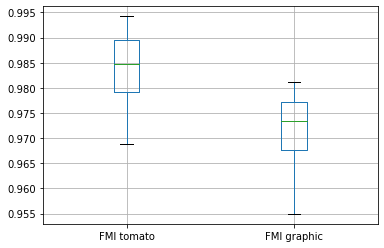

In [91]:
df1 = pd.DataFrame(FMI_tomato_1, columns = ['FMI tomato'])
df1['FMI graphic'] = FMI_graphic_1
print('standard')
boxplot = df1.boxplot()

low density


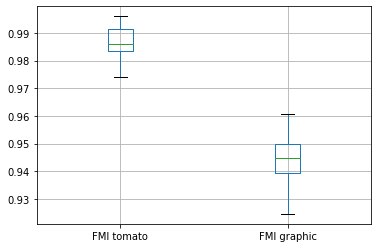

In [95]:
df2 = pd.DataFrame(FMI_tomato_2, columns = ['FMI tomato'])
df2['FMI graphic'] = FMI_graphic_2
print('low density')
boxplot = df2.boxplot()

different densities


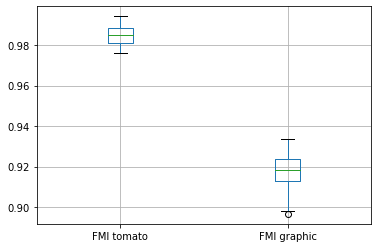

In [106]:
df4 = pd.DataFrame(FMI_tomato_4, columns = ['FMI tomato'])
df4['FMI graphic'] = FMI_graphic_4
print('different densities')
boxplot = df4.boxplot()

higher nosie level


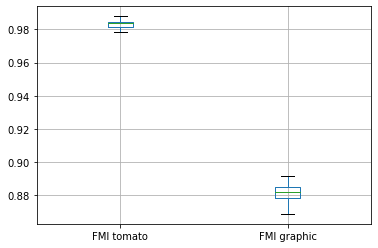

In [99]:
df3 = pd.DataFrame(FMI_tomato_3, columns = ['FMI tomato'])
df3['FMI graphic'] = FMI_graphic_3
print('higher nosie level')
boxplot = df3.boxplot()

In [5]:
ID = 2

In [6]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'
data = pd.read_csv(path + 'simulated_SMLM_' + str(ID)+ '.csv')

truelabels = data['labels_1'].to_numpy()
tomato_labels = pd.read_csv(path + 'tomato_result_' + str(ID) + '.csv')['x'].values

In [7]:
res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
print(res_FMI)

0.9859063734647504


In [9]:
ID = 3

In [10]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'
data = pd.read_csv(path + 'simulated_SMLM_' + str(ID)+ '.csv')

truelabels = data['labels_1'].to_numpy()
tomato_labels = pd.read_csv(path + 'tomato_result_' + str(ID) + '.csv')['x'].values

In [11]:
res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
print(res_FMI)

0.9808769419924483


In [12]:
ID = 4

In [13]:
path = '/Users/Eliana/Documents/PDM/Codes/My_codes/Data/'
data = pd.read_csv(path + 'simulated_SMLM_' + str(ID)+ '.csv')

truelabels = data['labels_1'].to_numpy()
tomato_labels = pd.read_csv(path + 'tomato_result_' + str(ID) + '.csv')['x'].values

In [14]:
res_FMI = metrics.fowlkes_mallows_score(truelabels, tomato_labels)
print(res_FMI)

0.9791596316107485
